<h3>2 Лабораторная работа</h3>

Цель - познакомиться с методом кластеризации K-mean с помощью пакета sklearn. 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

df = pd.read_csv('diabetes.csv')


<h4>1. Добавляем дополнительный столбец в таблицу.</h4>
Добавим весовую категорию:<br>
    &emsp;0: Недостаточный вес (< 18.5)<br>
    &emsp;1: Нормальный вес (18.5–24.9)<br>
    &emsp;2: Избыточный вес (25–29.9)<br>
    &emsp;3: Ожирение (>= 30)

In [39]:
bins = [0, 18.5, 25, 30, float('inf')]
labels = [0, 1, 2, 3]

df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False).astype(int)

print("Датасет с новым аттрибутом 'BMI_Category':")
print(df.head())

Датасет с новым аттрибутом 'BMI_Category':
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  BMI_Category  
0                     0.627   50        1             3  
1                     0.351   31        0             2  
2                     0.672   32        1             1  
3                     0.167   21        0             2  
4                     2.288   33        1             3  


<h4>2. "Причесать" датасет: удалить выбросы и дубли, обработать пропущенные значения, найти кривые данные и т.п.</h4>


In [40]:
# 1. Замена 0 на NaN (кроме где 0 - это нормально)
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# 2. Обработка пропущенных значений (NaN).
# Заполним пропуски медианным значением по каждой колонке.
for col in cols_with_zeros:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# 3. Проверка на дубликаты
duplicates_count = df.duplicated().sum()
print(f'Найдено дубликатов: {duplicates_count}')
if duplicates_count > 0:
    df.drop_duplicates(inplace=True)

print("Датасет после очистки от 0 и NaN:")
print(df.info())

Найдено дубликатов: 0
Датасет после очистки от 0 и NaN:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMI_Category              768 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 60.1 KB
None


<h4>3. Построить графики зависимости одной переменной от другой (plt.scatter), описать какие кластеры (группы) вы видите. Построить несколько разных графиков, найти ярковыраженные группы.</h4>

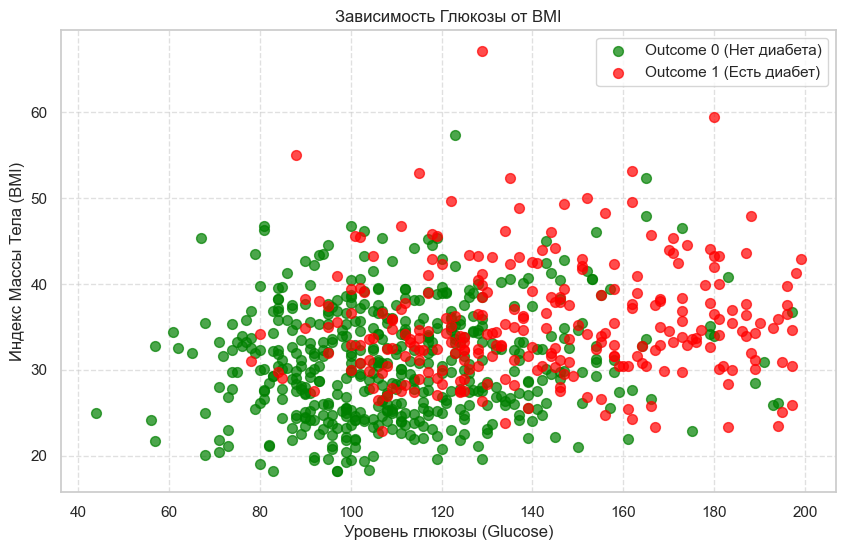

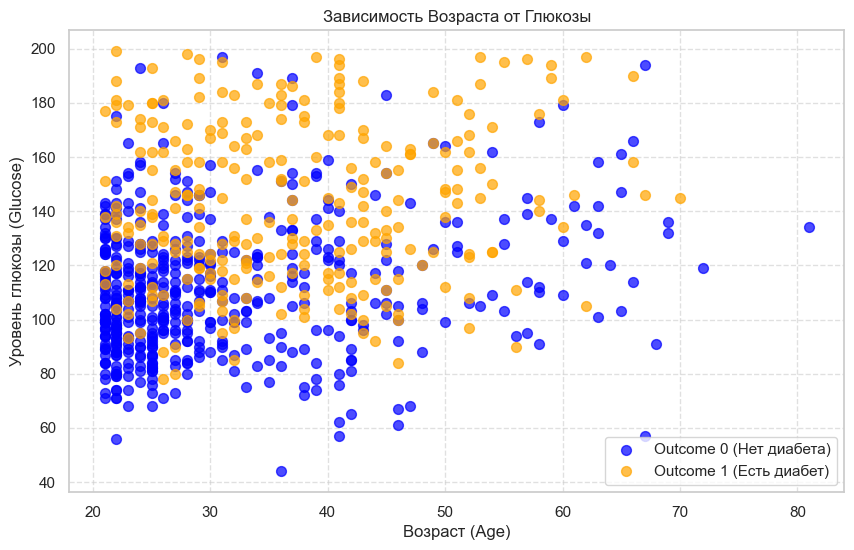

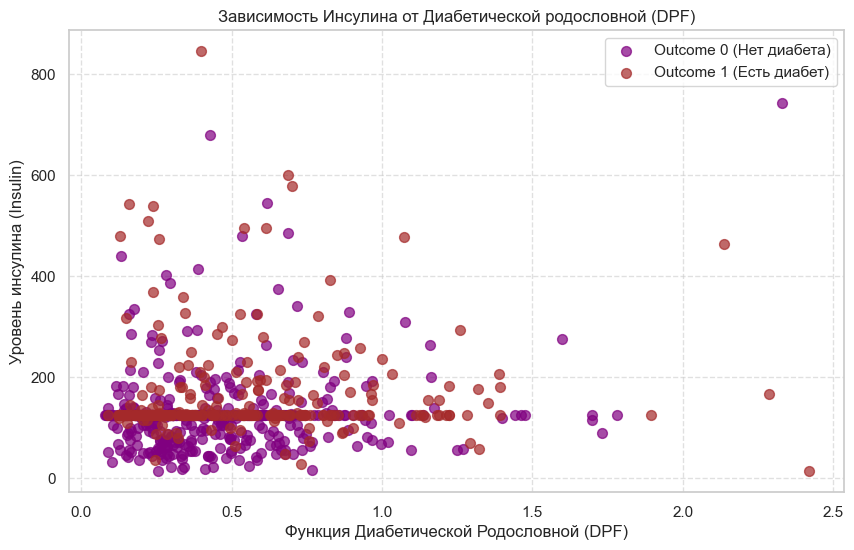

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

df_0 = df[df['Outcome'] == 0] # Нет диабета
df_1 = df[df['Outcome'] == 1] # Есть диабет

# --- 1. Глюкоза vs BMI ---
plt.figure(figsize=(10, 6))

# Нет диабета.
plt.scatter(df_0['Glucose'], df_0['BMI'], 
            c='green', label='Outcome 0 (Нет диабета)', alpha=0.7, s=50)

# Есть диабет.
plt.scatter(df_1['Glucose'], df_1['BMI'], 
            c='red', label='Outcome 1 (Есть диабет)', alpha=0.7, s=50)

plt.title('Зависимость Глюкозы от BMI')
plt.xlabel('Уровень глюкозы (Glucose)')
plt.ylabel('Индекс Массы Тела (BMI)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 2. Возраст vs Глюкоза ---
plt.figure(figsize=(10, 6))

# Нет диабета.
plt.scatter(df_0['Age'], df_0['Glucose'], 
            c='blue', label='Outcome 0 (Нет диабета)', alpha=0.7, s=50)

# Есть диабет.
plt.scatter(df_1['Age'], df_1['Glucose'], 
            c='orange', label='Outcome 1 (Есть диабет)', alpha=0.7, s=50)

plt.title('Зависимость Возраста от Глюкозы')
plt.xlabel('Возраст (Age)')
plt.ylabel('Уровень глюкозы (Glucose)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 3. Инсулин vs Диабетическая родословная (DPF) ---
plt.figure(figsize=(10, 6))

# Нет диабета.
plt.scatter(df_0['DiabetesPedigreeFunction'], df_0['Insulin'], 
            c='purple', label='Outcome 0 (Нет диабета)', alpha=0.7, s=50)

# Есть диабет.
plt.scatter(df_1['DiabetesPedigreeFunction'], df_1['Insulin'], 
            c='brown', label='Outcome 1 (Есть диабет)', alpha=0.7, s=50)

plt.title('Зависимость Инсулина от Диабетической родословной (DPF)')
plt.xlabel('Функция Диабетической Родословной (DPF)')
plt.ylabel('Уровень инсулина (Insulin)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

На графиках (особенно Глюкоза vs BMI и Возраст vs Глюкоза) мы видим ярко выраженные группы. Точки, относящиеся к Outcome=1 (диабет), явно смещены в область более высоких значений глюкозы, а также, как правило, более высокого BMI и возраста. Точки Outcome=0 (нет диабета) более плотно сгруппированы при более низких значениях глюкозы.

Это сильный показатель, что можно найти эти две группы.

<h4>4. Применить метод KMeans к вашему датасету.</h4>

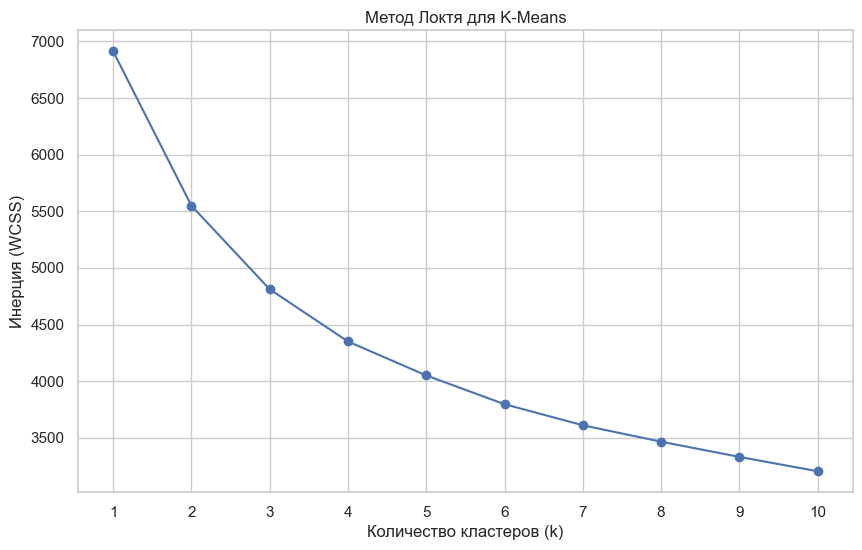

In [42]:
X = df.drop('Outcome', axis=1)
y_true = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Строим график "Локтя"
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Метод Локтя для K-Means')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

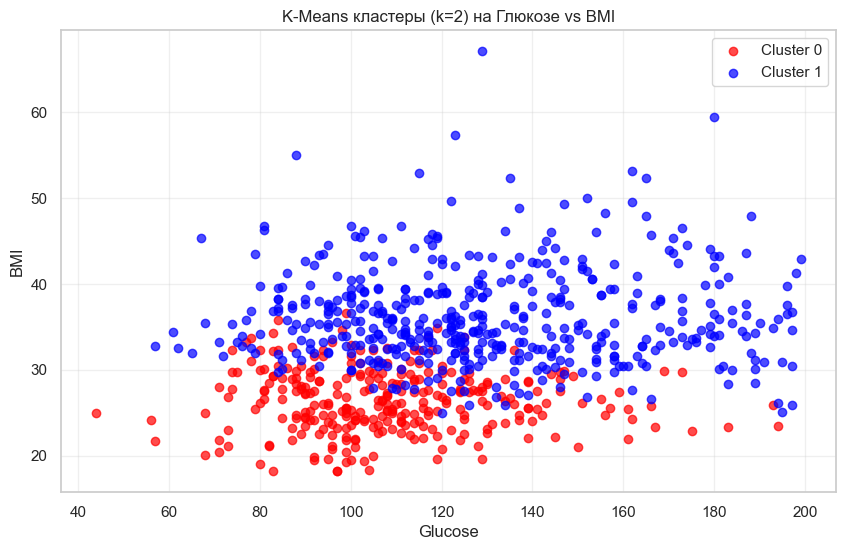


Сравнение реальных меток (Outcome) с кластерами K-Means:
Cluster    0    1
Outcome          
0        257  243
1         37  231

Adjusted Rand Score (ARS): 0.0676


In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans

plt.figure(figsize=(10, 6))

cluster_0 = df['Cluster'] == 0
cluster_1 = df['Cluster'] == 1

plt.scatter(df.loc[cluster_0, 'Glucose'], df.loc[cluster_0, 'BMI'], 
            c='red', label='Cluster 0', alpha=0.7)
plt.scatter(df.loc[cluster_1, 'Glucose'], df.loc[cluster_1, 'BMI'], 
            c='blue', label='Cluster 1', alpha=0.7)

plt.title('K-Means кластеры (k=2) на Глюкозе vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nСравнение реальных меток (Outcome) с кластерами K-Means:")
crosstab = pd.crosstab(df['Outcome'], df['Cluster'])
print(crosstab)

ars_score = adjusted_rand_score(y_true, y_kmeans)
print(f"\nAdjusted Rand Score (ARS): {ars_score:.4f}")


<h4>5. Вывод</h4>

1.  **Нашлась "чистая" группа:** В обоих случаях алгоритм выделил один кластер, который преимущественно состоит из здоровых пациентов.
2.  **Нашлась "смешанная" группа с большинством больных:** Второй кластер содержит подавляющее большинство пациентов с диабетом. При этом в этот же кластер попадает значительное число здоровых людей.
Алгоритм, не зная о диагнозах, смог изолировать большинство "больных" в одну группу. Это доказывает, что у пациентов с диабетом есть общие, математически уловимые паттерны в медицинских показателях.

*   **Сильная сторона:** Модель очень эффективно изолировала большинство пациентов с диабетом в отдельный кластер . Это говорит о том, что у данной группы пациентов есть ярко выраженные общие признаки (вероятно, высокие значения `Glucose` и `BMI`), которые алгоритм успешно уловил.
*   **Слабая сторона:** Разделение здоровых пациентов оказалось менее точным. Почти половина здоровых пациентов была отнесена к "диабетическому" Кластеру 1. Это может указывать на существование подгруппы здоровых пациентов с пограничными или повышенными показателями, которые по своим метрикам ближе к больным, чем к остальным здоровым.

Таким образом, K-Means доказал свою состоятельность как инструмент для первичного исследовательского анализа (EDA) в медицинских данных, позволяя выявлять скрытые группы и паттерны, которые могут стать основой для дальнейшего, более глубокого изучения и построения моделей машинного обучения с учителем. 